#### 1

In [234]:
import pandas as pd

cities = {"Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population": [347949, 975551, 233839, 583056]}

df_cities = pd.DataFrame(cities)
df_cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [235]:
#a
df_cities["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [236]:
#b
#returns list of false and true
df_gbg = df_cities["Kommun"] == "Göteborg"
print(df_gbg)

df_gbg = df_cities[df_gbg]
df_gbg

# skriva allt på en rad
# df_gbg = df_cities[df_cities["Kommun"] == "Göteborg"]

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool


,Kommun,Population
3,Göteborg,583056


In [237]:
#c background - new index column is created..., dont want that
df_cities_explore = df_cities.sort_values(by="Population", ascending=False).reset_index()
df_cities_explore

,index,Kommun,Population
0,1,Stockholm,975551
1,3,Göteborg,583056
2,0,Malmö,347949
3,2,Uppsala,233839


In [238]:
#c
df_cities = df_cities.sort_values(by="Population", ascending=False, ignore_index=True)
df_cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


In [239]:
#d
df_top_3_cities = df_cities.sort_values(by="Population", ascending=False).head(3)
df_top_3_cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


In [240]:
#e

tot_population = 10379295

#df_cities.insert(2, "Population (%)", [df_cities["Population (%)"][i] = (df_cities["Population"][i]/tot_population)*100 for i in range 4])
# kan inte göra så då 1. insert skriver över ursprungliga variabeln, 2. loopar inte i pandas utan den (precis som numpy) gör saker radvis/elementvis

#df_cities["Population (%)"]=round(100*(df_cities["Population"]/tot_population), 2)
#lägger till automatiskt ny kolumn då det inte fannssådan key
#round(what, antal decimaler)

df_cities["Population (%)"]=(100*(df_cities["Population"]/tot_population)).round(2)
df_cities

,Kommun,Population,Population (%)
0,Stockholm,975551,9.40
1,Göteborg,583056,5.62
2,Malmö,347949,3.35
3,Uppsala,233839,2.25


#### 2

In [241]:
import pandas as pd

df = pd.read_excel(
    "../Data/komtopp50_2020.xlsx", sheet_name="Totalt", usecols="A:F", header=6
)
df.head()


,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


In [243]:
df.describe()

,2020,2019,2020.1,2019.1,%
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862,0.154672
std,83.860002,83.856743,74627.031657,74292.525065,0.953047
min,1.000000,1.000000,2387.000000,2408.000000,-3.208917
25%,73.250000,73.250000,10014.500000,10075.000000,-0.392807
50%,145.500000,145.500000,16079.500000,15978.000000,0.147039
75%,217.750000,217.750000,36215.250000,36096.750000,0.737224
max,290.000000,290.000000,975551.000000,974073.000000,4.088165


In [244]:
df = df.rename(
    columns={
        2020: "Rang 2020",
        2019: "Rang 2019",
        "Unnamed: 2": "Kommun",
        "2020.1": "Folkmängd 2020",
        "2019.1": "Folkmängd 2019",
        "%": "Förändring",
    }
)
df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [245]:
df_5_smalest = df.sort_values(by="Folkmängd 2020",ignore_index=True).head()
# ingore_index så den inte lägger på en ny kolumn med gamla index
df_5_smalest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701


In [246]:
df_5_largest = df.sort_values(by="Folkmängd 2020", ascending=False, ignore_index=True).head()
df_5_largest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [247]:
tot_2020 = df["Folkmängd 2020"].sum()
tot_2019 = df["Folkmängd 2019"].sum()
print(f"{tot_2020=},{tot_2019=}")

tot_2020=10379295,tot_2019=10327589


In [248]:
#----------------------------------------------------------------
#TODO: Gör om plottningen från huvudet uppgift 2f














#------------------------------------------------------------

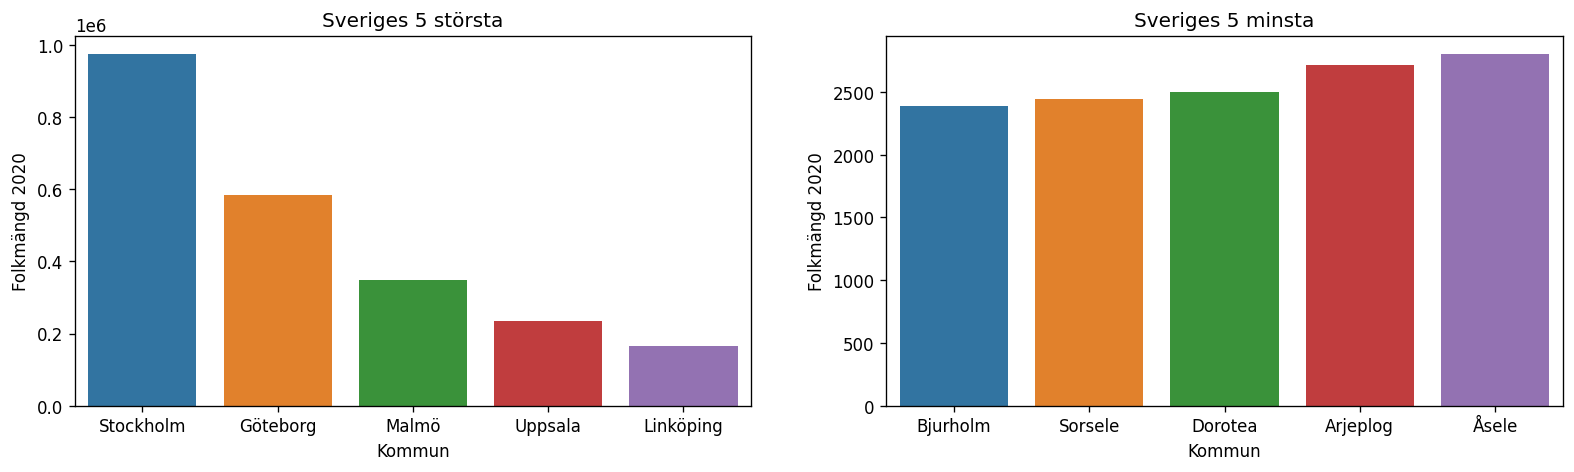

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize = (16,4), dpi = 120)
titles = ["Sveriges 5 största", "Sveriges 5 minsta"]
data_frame = [df_5_largest, df_5_smalest]

for i, (dataset, title) in enumerate(zip(data_frame, titles)):
    sns.barplot(ax= axes[i], data=dataset, x = "Kommun", y = "Folkmängd 2020" )
    axes[i].set(title = title)
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
    #denna rad fanns i exemplet från Lekt, dock funkar utan. Skillnaden blir att labels inte roteras


In [250]:
#testar vad denna innehåller (från plottning 2f ovan)
print(axes[0].get_xticklabels())

[Text(0, 0, 'Stockholm'), Text(1, 0, 'Göteborg'), Text(2, 0, 'Malmö'), Text(3, 0, 'Uppsala'), Text(4, 0, 'Linköping')]


# 3

In [251]:
import pandas as pd

df_tot = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")
df_female = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Kvinnor")
df_male = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Män")

#df_male = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Män").drop(df.index[0:6]).reset_index(drop=True)
# drop(df.index[0:6]) to remove top 7 rows
#reset_index(drop=True) to start indexing at 0; drop=True new indexing instead of added additional column with index
# alt för att ta bort översta raderna är också att sätta header = 6 i read_excel()
# could also read in all 3 sheets as dict:
    #sheet_names = ["Kvinnor", "Män"]
    #df_dict = pd.read_excel(file_path, sheet_name=sheet_names, header=6) # reading 3 sheets, stored as dict

df_tot.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


#### a)

In [252]:
def clean_df(df):
    df = df.rename(
        columns={
            "Unnamed: 0": "Rang 2020",
            "Unnamed: 1": "Rang 2019",
            "Unnamed: 2": "Kommun",
            "Unnamed: 3": "Folkmängd 2020",
            "Unnamed: 4": "Folkmängd 2019",
            "Unnamed: 5": "Förändring",
            "Unnamed: 6": "Folkmängd 2020",
        }
    )
    df = df.drop(df.index[0:6]).reset_index(drop=True)
    return df

df_tot = clean_df(df_tot)
df_female = clean_df(df_female)
df_male = clean_df(df_male)

df_female["Kön"] = ["Kvinna" for _ in range(len(df_female))]
df_male["Kön"] = ["Man" for _ in range(len(df_male))]

In [253]:
df_female

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85.0,Ale,15612,15348.0,1.720094,Kvinna
1,64,64.0,Alingsås,20900,20774.0,0.606527,Kvinna
2,123,123.0,Alvesta,9857,9795.0,0.632976,Kvinna
3,255,255.0,Aneby,3318,3350.0,-0.955224,Kvinna
4,165,164.0,Arboga,6945,6973.0,-0.401549,Kvinna
...,...,...,...,...,...,...,...
285,55,57.0,Österåker,22997,22442.0,2.473042,Kvinna
286,117,118.0,Östhammar,10846,10803.0,0.398038,Kvinna
287,160,159.0,Östra Göinge,7270,7262.0,0.110162,Kvinna
288,284,284.0,Överkalix,1559,1578.0,-1.204056,Kvinna


#### b)

In [254]:
df_fem_male = pd.concat([df_female, df_male]).set_index("Kommun")
df_fem_male

,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,,,
Ale,84,85.0,15612,15348.0,1.720094,Kvinna
Alingsås,64,64.0,20900,20774.0,0.606527,Kvinna
Alvesta,123,123.0,9857,9795.0,0.632976,Kvinna
Aneby,255,255.0,3318,3350.0,-0.955224,Kvinna
Arboga,165,164.0,6945,6973.0,-0.401549,Kvinna
...,...,...,...,...,...,...
Österåker,52,55.0,23647,23132.0,2.226353,Man
Östhammar,115,115.0,11405,11447.0,-0.366908,Man
Östra Göinge,158,156.0,7747,7745.0,0.025823,Man


#### c)

In [255]:
df_tot.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074


In [256]:
df_tot_extracted = df_tot[["Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]]
df_tot_extracted = df_tot_extracted.rename(
    columns={
        "Folkmängd 2020": "Total Pop 2020",
        "Folkmängd 2019": "Total Pop 2019",
        "Förändring": "Total förändring",
    }
)
df_tot_extracted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kommun            290 non-null    object 
 1   Total Pop 2020    290 non-null    object 
 2   Total Pop 2019    290 non-null    float64
 3   Total förändring  290 non-null    object 
dtypes: float64(1), object(3)
memory usage: 9.2+ KB


#### d)

In [257]:
df_fem_male_extracted = df_fem_male[["Folkmängd 2020", "Folkmängd 2019", "Förändring", "Kön"]]
df_fem_male_extracted.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,
Ale,15612,15348.0,1.720094,Kvinna
Alingsås,20900,20774.0,0.606527,Kvinna
Alvesta,9857,9795.0,0.632976,Kvinna
Aneby,3318,3350.0,-0.955224,Kvinna
Arboga,6945,6973.0,-0.401549,Kvinna


In [258]:
df_tot_extracted = df_tot_extracted.set_index("Kommun")
df_tot_extracted.head()

,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,
Ale,31868,31402.0,1.483982
Alingsås,41602,41420.0,0.439401
Alvesta,20224,20134.0,0.447005
Aneby,6821,6848.0,-0.394276
Arboga,14039,14087.0,-0.34074


In [259]:
df_merged = pd.merge(df_fem_male_extracted, df_tot_extracted, left_on="Kommun", right_on="Kommun")
# both df to be merged have had Kommun set as index
df_merged.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Ale,15612,15348.0,1.720094,Kvinna,31868,31402.0,1.483982
Ale,16256,16054.0,1.258253,Man,31868,31402.0,1.483982
Alingsås,20900,20774.0,0.606527,Kvinna,41602,41420.0,0.439401
Alingsås,20702,20646.0,0.271239,Man,41602,41420.0,0.439401
Alvesta,9857,9795.0,0.632976,Kvinna,20224,20134.0,0.447005


In [260]:
df_merged_sorted = df_merged.sort_values(by="Total Pop 2020", ascending = False)
df_merged_sorted

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,492569,491853.0,0.145572,Kvinna,975551,974073.0,0.151734
Stockholm,482982,482220.0,0.158019,Man,975551,974073.0,0.151734
Göteborg,292505,290308.0,0.756782,Man,583056,579281.0,0.65167
Göteborg,290551,288973.0,0.546072,Kvinna,583056,579281.0,0.65167
Malmö,172538,170623.0,1.122357,Man,347949,344166.0,1.099179
...,...,...,...,...,...,...,...
Dorotea,1327,1356.0,-2.138643,Man,2498,2551.0,-2.077617
Sorsele,1157,1170.0,-1.111111,Kvinna,2442,2489.0,-1.888309
Sorsele,1285,1319.0,-2.57771,Man,2442,2489.0,-1.888309


#### e)

ValueError: Could not interpret input 'Kommun'

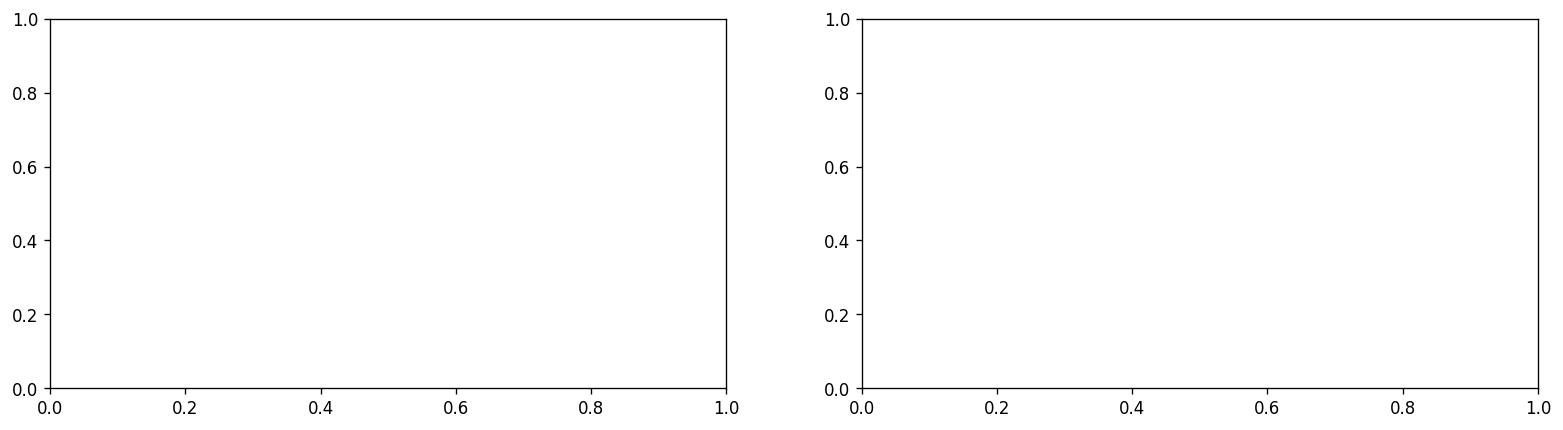

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

df_10_largest_cities = df_merged_sorted.head(20)
df_10_smallest_cities = df_merged_sorted.tail(20)

fig, axes = plt.subplots(1,2, figsize=(16,4), dpi = 120)
data_frames = [df_10_largest_cities, df_10_smallest_cities]
titles = ["Polulation largest cities", "Population smalest cities"]

for i, (data_frame, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data_frame, x = "Kommun", y = "Folkmängd 2020", ax=axes[i])
    axes[i].set_title(title) # alt #axes[i].set(title = title) eller axes[i].set_title(titles[i]) om titles inte loopas med zip
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

#???????????????? varför funkar det inte att plotta efter att ha kört om alla???????????????


ValueError: Could not interpret input 'Kommun'

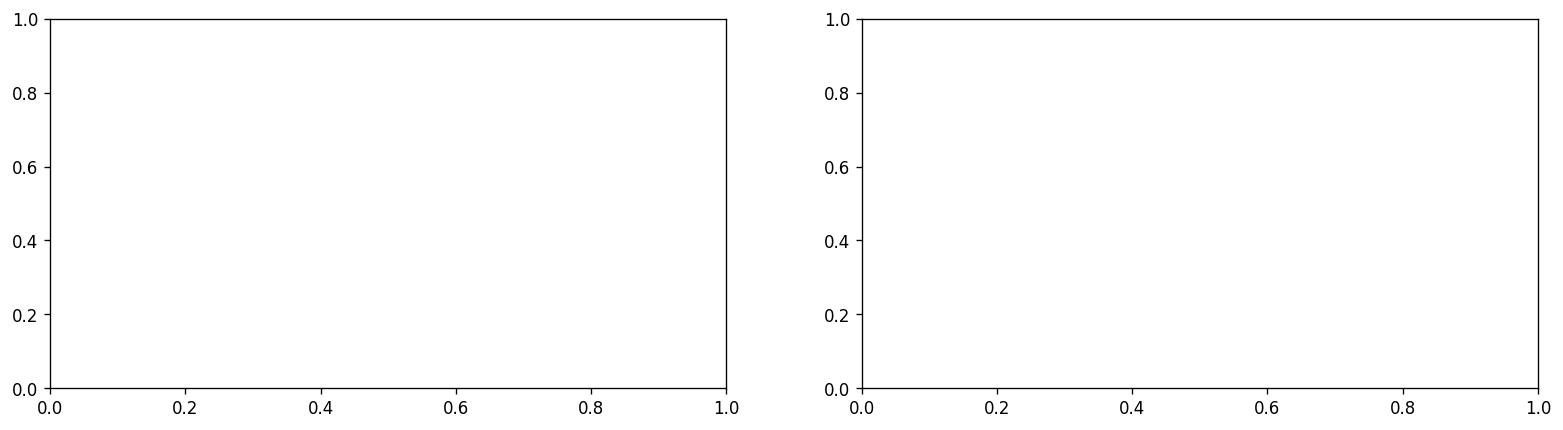

In [262]:
fig, axes = plt.subplots(1,2, figsize=(16,4), dpi = 120)
data_frames = [df_10_largest_cities, df_10_smallest_cities]
titles = ["Polulation largest cities", "Population smalest cities"]

for i, (data_frame, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data_frame, y = "Kommun", x= "Folkmängd 2020", ax=axes[i], hue="Kön")
    axes[i].set_title(title)

#hue to separate Kvinna och Man based on columns "Kön"
# switched x and y compared to graphs abouve to change direction of current graphs

#???????????????? varför funkar det inte att plotta efter att ha kört om alla???????????????

#### f)

In [ ]:
#Testar hur pie chart funkar
data = [30, 70]
keys = ["Female", "Male"]

plt.pie(x=data, labels=keys)
plt.show()

In [263]:
df_merged

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Ale,15612,15348.0,1.720094,Kvinna,31868,31402.0,1.483982
Ale,16256,16054.0,1.258253,Man,31868,31402.0,1.483982
Alingsås,20900,20774.0,0.606527,Kvinna,41602,41420.0,0.439401
Alingsås,20702,20646.0,0.271239,Man,41602,41420.0,0.439401
Alvesta,9857,9795.0,0.632976,Kvinna,20224,20134.0,0.447005
...,...,...,...,...,...,...,...
Östra Göinge,7747,7745.0,0.025823,Man,15017,15007.0,0.066636
Överkalix,1559,1578.0,-1.204056,Kvinna,3289,3315.0,-0.784314
Överkalix,1730,1737.0,-0.402994,Man,3289,3315.0,-0.784314


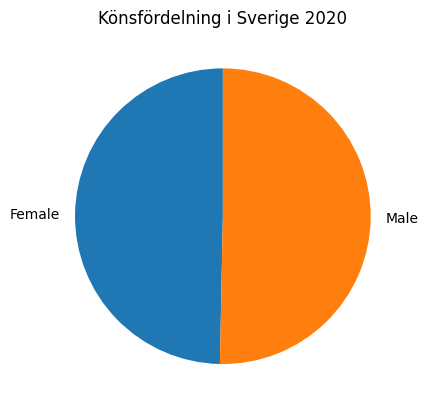

In [264]:
# en fullösning med en massa variabler och steg....

total_pop_2020 = df_merged["Folkmängd 2020"].sum()
female_2020 = df_merged[df_merged["Kön"] == "Kvinna"]
total_female_2020 = female_2020["Folkmängd 2020"].sum()
male_2020 = df_merged[df_merged["Kön"] == "Man"]
total_male_2020 = male_2020["Folkmängd 2020"].sum()

part_female_2020 = 100*(total_female_2020/total_pop_2020)
part_male_2020 = 100*(total_male_2020/total_pop_2020)

data = [part_female_2020, part_male_2020]
labels = ["Female", "Male"]

plt.pie(x=data, labels=labels, startangle=90) #?????????Hur göra så värden viasa i grafen????????????
plt.title("Könsfördelning i Sverige 2020")
plt.show()

# eller på 1 rad
# total_female_2020 = df_merged[df_merged["Kön"] == "Kvinna"]["Folkmängd 2020"].sum()

In [265]:
gender_sums = df_merged.groupby("Kön").sum("Folkmängd 2020")
gender_sums
#??????????????? varför bir det 2019 och inte 2020?????
#??????????????????? varför summerar den även Total Pop??????????? och varför bara 2019???????

#gender_sums["Könsfördeling"] = (100*gender_sums["Folkmängd 2020"]/gender_sums["Total Pop 2020"])

,Folkmängd 2019,Total Pop 2019
Kön,,
Kvinna,5131775.0,10327589.0
Man,5195814.0,10327589.0


#### g)
Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

In [ ]:
# want to concatinate so both male and female are on the same row, thus 1 row/column
# preparations are renaming columns and making Kommun as index
# concatinate
# calculate difference between male and female and save in new column
# sort and plot

In [270]:
df_female_for_g = df_female.rename(columns= {"Folkmängd 2020": "Kvinnor 2020"}).set_index("Kommun")
df_female_for_g = df_female_for_g[["Kvinnor 2020"]]
df_female_for_g.head(2)

,Kvinnor 2020
Kommun,
Ale,15612
Alingsås,20900


In [271]:
df_male_for_g = df_male.rename(columns= {"Folkmängd 2020": "Män 2020"}).set_index("Kommun")
df_male_for_g = df_male_for_g[["Män 2020"]]
df_male_for_g.head(2)

,Män 2020
Kommun,
Ale,16256
Alingsås,20702


In [282]:
df_tot_for_g = df_tot.rename(columns= {"Folkmängd 2020": "Tot 2020"}).set_index("Kommun")
df_tot_for_g = df_tot_for_g[["Tot 2020"]]
df_tot_for_g.head(2)

,Tot 2020
Kommun,
Ale,31868
Alingsås,41602


In [284]:
df_fem_male_for_g = pd.concat([df_female_for_g, df_male_for_g, df_tot_for_g], axis=1)
df_fem_male_for_g["Gender diff 2020"] = abs(df_fem_male_for_g["Kvinnor 2020"]-df_fem_male_for_g["Män 2020"])
df_fem_male_for_g["Relative diff 2020"] = 100*(df_fem_male_for_g["Gender diff 2020"]/df_fem_male_for_g["Tot 2020"])
df_fem_male_for_g.head(2)

,Kvinnor 2020,Män 2020,Tot 2020,Gender diff 2020,Relative diff 2020
Kommun,,,,,
Ale,15612,16256,31868,644,2.020836
Alingsås,20900,20702,41602,198,0.475939


In [286]:
df_fem_male_for_g_sorted = df_fem_male_for_g.sort_values(by="Relative diff 2020")
df_fem_male_for_g_sorted.tail(5)

,Kvinnor 2020,Män 2020,Tot 2020,Gender diff 2020,Relative diff 2020
Kommun,,,,,
Överkalix,1559,1730,3289,171,5.199149
Sorsele,1157,1285,2442,128,5.241605
Bräcke,2916,3265,6181,349,5.646336
Dorotea,1171,1327,2498,156,6.244996
Pajala,2778,3188,5966,410,6.872276


In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = df_fem_male_for_g_sorted.tail(5)["Kvinnor 2020", "Män 2020"], x = "Kommun", y = "Tot 2020")
plt.title("Title bla bla bla")


#???????????????? Varför går det inte att plotta?????????????????
#???????????????? Hur indikera att ska plotta Kvinnor 2020, Män 2020 för varje kommun???????????????
#?????????????? Skall x och y motsvara kolumnnamn? i detta fall Kommun och Tot 2020?????????????????
#???????????????? Hur sätter jag titel???????????????????????
#??????????? När skall jag använda plt och när sns?????????????????????

KeyError: ('Kvinnor 2020', 'Män 2020')

#### h)
Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)